In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# IMDB review classifier

Data base of 50000 movie revies that will be split into 25k for training and 25k for testing, each of which have 50% of negative reviews and 50% of positive reviews. num_words=10k means that only the top 10k most used words will be taken into account.

In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

We start by creating a network with 2 intermidiate layers with 16 hidden units each, and an output layer. The first one uses relu as activation function and the seconds one uses sigmoid in order to output a probability, a number between 0 and 1. 

In [5]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Here we choose the loss function and the optimized. We choose crossentropy, because it computes the distance between probability distributions, which is helpfull since the last layers outputs a probability. 

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.3004 - acc: 0.9049 - val_loss: 0.3004 - val_acc: 0.8895
Epoch 3/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2179 - acc: 0.9286 - val_loss: 0.3086 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1751 - acc: 0.9438 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3163 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

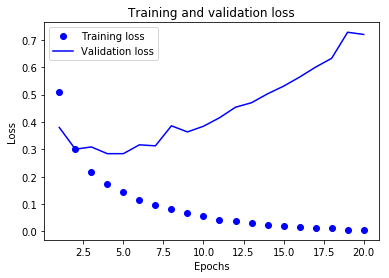

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, 20 + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()




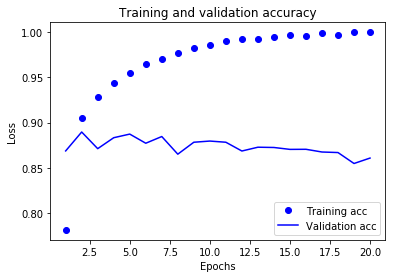

In [10]:

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

From the graphic is possible to see that, for the training set, the accuracy increases with the epoch and the loss decreases, which is what we where expecting. On the other hand, the same is not observed in the validation set, making this a case of overfitting. The model is well trained for the training set but behaves poorly with the validation set. In order to solve this issue we should decrease the number of epoch. 


In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 130us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 77us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 3s 132us/step


# To evaluate if our model is the best


### Using only one hidden layer


In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 153us/step - loss: 0.4477 - acc: 0.8325
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2797 - acc: 0.9077
Epoch 3/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2214 - acc: 0.9244
Epoch 4/4
25000/25000 [==============================] - 3s 140us/step


In [14]:
results


[0.2789416261291504, 0.8888]

### Using 3 hidden layers

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 163us/step - loss: 0.4602 - acc: 0.8175
Epoch 2/4
25000/25000 [==============================] - 2s 73us/step - loss: 0.2506 - acc: 0.9105
Epoch 3/4
25000/25000 [==============================] - 2s 72us/step - loss: 0.2007 - acc: 0.9260
Epoch 4/4
25000/25000 [==============================] - 3s 136us/step


In [16]:
results


[0.307541703414917, 0.88004]

### Hidden layers with more hidden units (32)

In [17]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 169us/step - loss: 0.4249 - acc: 0.8270
Epoch 2/4
25000/25000 [==============================] - 2s 82us/step - loss: 0.2420 - acc: 0.9111
Epoch 3/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.1855 - acc: 0.9316
Epoch 4/4
25000/25000 [==============================] - 4s 159us/step


In [18]:
results


[0.32652115415096283, 0.87424]

### Hidden layers with more hidden units (64)

In [19]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 166us/step - loss: 0.4119 - acc: 0.8299
Epoch 2/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.2345 - acc: 0.9125
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1846 - acc: 0.9320
Epoch 4/4
25000/25000 [==============================] - 4s 146us/step


In [20]:
results


[0.3200162315940857, 0.87856]